<a href="https://colab.research.google.com/github/pablex72/time-series-crop/blob/main/Exploratory_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
df = pd.read_csv('/content/interpolated_data.csv')
df.head()

,Date,NDVI,Interpolated Values
0,2019-01-26,0.708,0.741278
1,2019-01-31,NaN,0.690516
2,2019-02-05,0.695,0.633323
3,2019-02-10,NaN,0.572574
4,2019-02-15,NaN,0.511143


In [72]:
#Rename date column
#df.rename() #dict (old:new), axis (0 for rows, 1 for cols), inplace = true)
#invoices.drop(['client'], axis=1)

df_inter = df.drop(['NDVI'], axis=1)
df_inter.rename({'Interpolated Values':'NDVI'}, axis = 1, inplace =True)
df_inter.head()

,Date,NDVI
0,2019-01-26,0.741278
1,2019-01-31,0.690516
2,2019-02-05,0.633323
3,2019-02-10,0.572574
4,2019-02-15,0.511143


Change dates to datatime objects and set Date as index

In [73]:
df_inter['Date'] = pd.to_datetime(df_inter.Date)
df_inter.set_index('Date' ,inplace = True)
df_inter.head()

,NDVI
Date,
2019-01-26,0.741278
2019-01-31,0.690516
2019-02-05,0.633323
2019-02-10,0.572574
2019-02-15,0.511143


<Axes: xlabel='Date'>

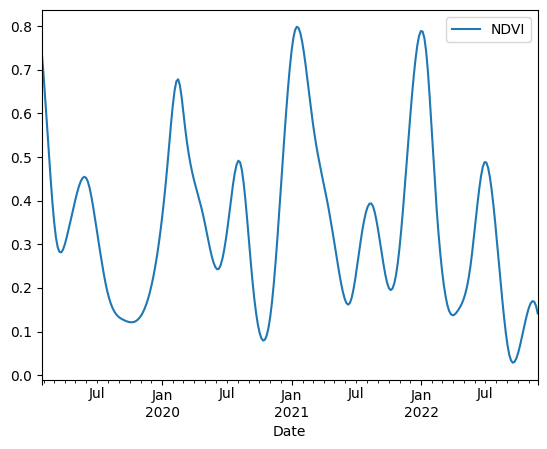

In [74]:
df_inter.plot()

<Axes: xlabel='Date'>

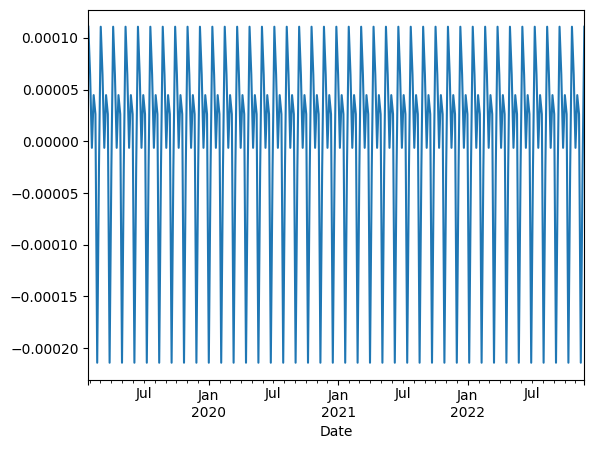

In [75]:
#trending up and cyclic - decomposing the data into parts
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_inter)
decomp.seasonal.plot()

In [76]:
# creating a dataframe where the columns are years an the rows are months,
# so what we can compare years against one another
years = pd.DataFrame(index = range(1,13))
years

""
1
2
3
4
5
6
7
8
9
10


In [77]:
  # We want to group df by year and extract each year's data as a separate column
  df_inter = df_inter.reset_index() #putting the date as a column

  #We can actually group by a function on a column instead of just on column values
  df_inter.groupby(df_inter.Date.apply(lambda x: x.year)).mean()

<ipython-input-77-87859b88c7cc>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_inter.groupby(df_inter.Date.apply(lambda x: x.year)).mean()


,NDVI
Date,
2019,0.289957
2020,0.385338
2021,0.421731
2022,0.270566


In [ ]:
# Place each year's data into years dataframe as a separate column

for name,yr in df_inter.groupby(df_inter.Date.apply(lambda x:x.year)):
  years[name] = yr.NDVI.values

#years